<div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: chetwode; font-size:100%; text-align:center">
<center> <h1> Pycaret  </h1>
    <h3><a href="https://pycaret.gitbook.io/docs/">An open-source, low-code machine learning library in Python</a></h3><br>

<center><div style="border-radius:0px; border:3eb489 ; padding: 12px; background-color: e6f2e6; font-size:110%; text-align:center">PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.
    PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.
</div>


## ⬇️ Importing Libraries

In [1]:
import pandas  as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
import warnings


## 📂 Reading files 

In [2]:
train_X=pd.read_csv('/kaggle/input/nsutai-kaggle-contributor-tutorial/train_X.csv')
train_y=pd.read_csv('/kaggle/input/nsutai-kaggle-contributor-tutorial/train_y.csv')
test_X=pd.read_csv('/kaggle/input/nsutai-kaggle-contributor-tutorial/test_X.csv')

#Preprocessing
train_y['target']=train_y['0']
train_y.drop(['0','index'],axis=1,inplace=True)
train_X.drop(['index'], axis=1,inplace=True)


df=pd.concat([train_X,train_y],axis=1)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.193195,2.973610,0.034247,1.975187,-3.672735,-0.631165,0.543451,-0.341034,1.032239,-1.219890,...,8.076741,3.052458,-0.286441,0.192095,3.370226,-1.921979,-1.741345,-0.091755,1.978647,0
1,0.319216,-0.773181,-1.246299,0.974744,2.878995,0.354357,0.086921,0.187849,-0.051989,0.119739,...,-2.927811,-3.947068,-0.146335,0.927605,0.606096,1.506149,-2.374060,0.532287,1.835969,1
2,0.709360,-3.250394,0.467022,-0.609710,-2.642611,2.285088,0.579208,-0.427497,1.377879,-1.528172,...,-3.526380,3.586155,-0.148712,-1.422066,6.439270,3.033149,1.332527,-0.459036,-1.016314,0
3,-0.171636,0.318786,-4.567628,-1.813473,-1.316424,1.477205,0.552983,-0.976615,-1.740296,-0.786338,...,0.955421,0.313838,-0.559353,0.274539,-4.378145,0.134201,-0.173590,-1.083645,0.791359,1
4,-1.027135,2.781835,-1.551669,4.352007,0.952213,3.563014,-0.055755,0.738818,0.524259,0.500662,...,2.643838,-2.822410,0.786571,0.054693,-5.450708,-1.467301,-0.461681,-0.036910,2.212297,1


## ⬇️ Installing Pycaret

For a complete tutorial on Pycaret refer this:    https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

In [4]:
!python -m pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.

## 🚀 Quick start


PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.




In [5]:
from pycaret.classification import *

## 💻 Setup
This function initializes the training environment,Setup function must be called before executing any other function in PyCaret

In [6]:
model = setup(data = df, target = 'target', normalize = True, session_id=123) 


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(8000, 21)"
4,Transformed data shape,"(8000, 21)"
5,Transformed train set shape,"(5600, 21)"
6,Transformed test set shape,"(2400, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


## 🤖 Compare Models
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores

In [7]:
best_accuracy_models = compare_models(sort='Accuracy',n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8857,0.9291,0.8948,0.8779,0.8862,0.7714,0.7718,6.5570
et,Extra Trees Classifier,0.8752,0.9245,0.8787,0.8718,0.8750,0.7504,0.7506,0.6480
lightgbm,Light Gradient Boosting Machine,0.8711,0.9210,0.8844,0.8606,0.8722,0.7422,0.7427,0.8810
rf,Random Forest Classifier,0.8675,0.9197,0.8686,0.8657,0.8670,0.7350,0.7352,1.1430
xgboost,Extreme Gradient Boosting,0.8655,0.9200,0.8747,0.8580,0.8662,0.7311,0.7314,1.2020
knn,K Neighbors Classifier,0.8452,0.8956,0.8582,0.8355,0.8464,0.6904,0.6911,0.1020
gbc,Gradient Boosting Classifier,0.8420,0.9029,0.8579,0.8305,0.8438,0.6840,0.6846,1.7250
qda,Quadratic Discriminant Analysis,0.7775,0.8394,0.8195,0.7560,0.7855,0.5552,0.5587,0.0620
ada,Ada Boost Classifier,0.7486,0.8205,0.7498,0.7464,0.7480,0.4971,0.4973,0.5210
dt,Decision Tree Classifier,0.7405,0.7405,0.7279,0.7451,0.7361,0.4810,0.4814,0.1310


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [8]:
#Top 3 models with highest accuracy score on our data
best_accuracy_models

 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]

## ✅ Blend Models (optional)
This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold.

This step is optional you can simply use the top performing model using `best_accuracy_models[0]`

In [9]:
# blend top 3 models
blender = blend_models(best_accuracy_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.9229,0.9068,0.8815,0.8940,0.7857,0.7861
1,0.8857,0.9193,0.9032,0.8720,0.8873,0.7715,0.7719
2,0.8929,0.9395,0.8925,0.8925,0.8925,0.7857,0.7857
3,0.8911,0.9241,0.8961,0.8865,0.8913,0.7821,0.7822
4,0.8750,0.9293,0.8996,0.8567,0.8776,0.7500,0.7510
5,0.8893,0.9351,0.9068,0.8754,0.8908,0.7786,0.7791
6,0.8714,0.9354,0.8669,0.8732,0.8700,0.7428,0.7428
7,0.8875,0.9246,0.9065,0.8720,0.8889,0.7751,0.7757
8,0.8786,0.9312,0.8921,0.8671,0.8794,0.7572,0.7575


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
blender

VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7e77860d1b70>),
                             ('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_sp...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## 💾Save Model
Finally, you can save the entire pipeline on disk for later use, using pycaret's save_model function.

In [11]:
# save pipeline
save_model(blender, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=..

## 🎯 Prediction

In [12]:
#instead of blender you can also use top performing cat boost model by `best_accuracy_models[0]`
holdout_pred = predict_model(blender)
#predicting on test dataset
predictions = predict_model(blender, data = test_X)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8883,0.9341,0.8920,0.8846,0.8882,0.7767,0.7767


## 🔎 Analyze Model
You can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

        Available plots in pycaret
        
        * 'pipeline' - Schematic drawing of the preprocessing pipeline
        * 'auc' - Area Under the Curve
        * 'threshold' - Discrimination Threshold
        * 'pr' - Precision Recall Curve
        * 'confusion_matrix' - Confusion Matrix
        * 'error' - Class Prediction Error
        * 'class_report' - Classification Report
        * 'boundary' - Decision Boundary
        * 'rfe' - Recursive Feature Selection
        * 'learning' - Learning Curve
        * 'manifold' - Manifold Learning
        * 'calibration' - Calibration Curve
        * 'vc' - Validation Curve
        * 'dimension' - Dimension Learning
        * 'feature' - Feature Importance
        * 'feature_all' - Feature Importance (All)
        * 'parameter' - Model Hyperparameter
        * 'lift' - Lift Curve
        * 'gain' - Gain Chart
        * 'tree' - Decision Tree
        * 'ks' - KS Statistic Plot

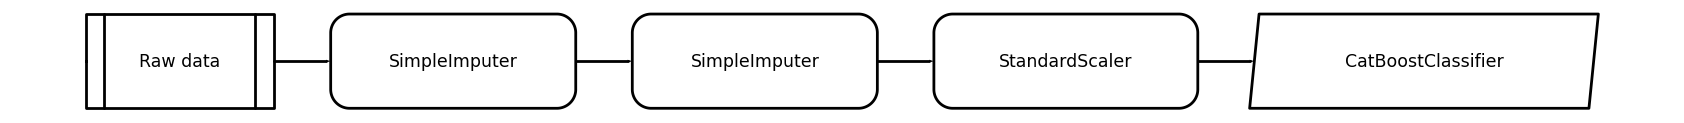




_________________________________________   confusion_matrix   ___________________________________________


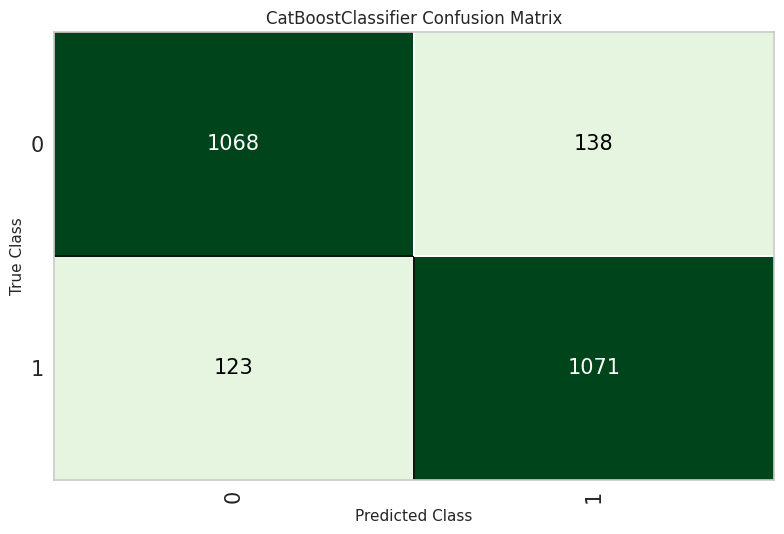




_________________________________________   error   ___________________________________________


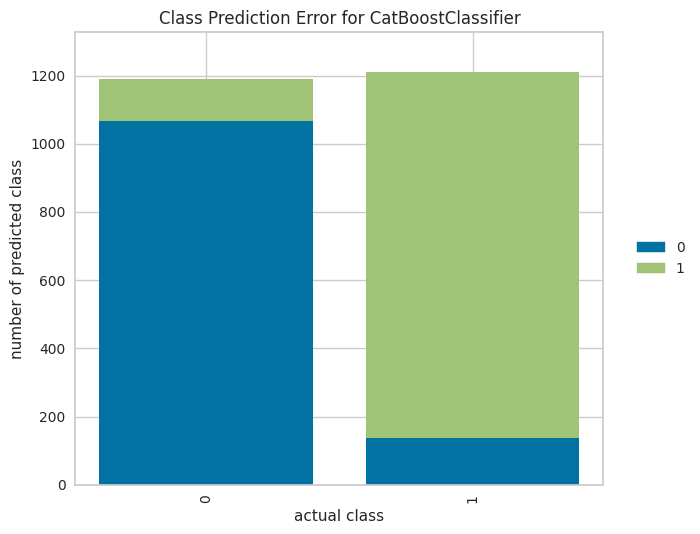




_________________________________________   class_report   ___________________________________________


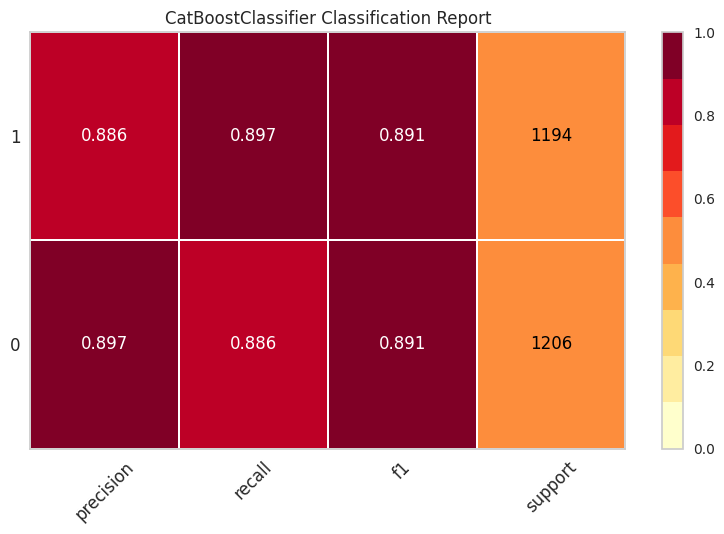




_________________________________________   feature_all   ___________________________________________


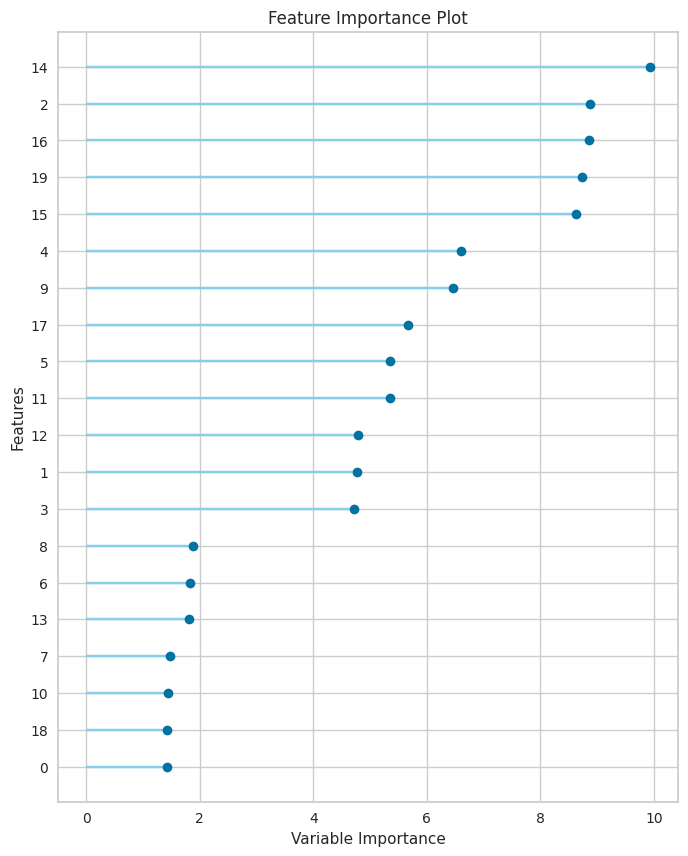




_________________________________________   parameter   ___________________________________________


,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant


In [13]:
#You can choose from the available plots above 


available_plots = ['pipeline','confusion_matrix','error','class_report','feature_all','parameter']
    
for i in available_plots:
    print('_________________________________________  ',i,'  ___________________________________________',sep=' ')
    plot_model(best_accuracy_models[0],plot=i)
    print('\n\n')

# Submission

In [14]:
predictions.head()

,index,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,prediction_label,prediction_score
0,0,0.538462,2.222378,-0.192168,1.134142,-3.913152,-0.734418,0.016328,-0.527915,-0.857418,...,3.660530,1.109485,0.680827,3.576809,-0.954336,-1.608120,-0.187374,1.324951,0,0.9027
1,1,-0.880609,-0.339642,-0.927948,-1.439864,-2.156597,1.562190,1.361925,2.030354,1.804044,...,1.330182,0.881547,0.538373,-2.666545,-2.127695,-1.265364,-1.508816,-1.322627,0,0.6688
2,2,-1.222889,1.249152,-1.109067,2.286618,3.467118,0.378403,-0.884889,-0.051223,-0.150834,...,-1.620498,-0.263016,-0.685167,-2.498091,1.123211,1.272391,-0.642454,-0.322244,1,0.7555
3,3,0.886710,0.473086,1.816406,1.382759,0.803539,-1.949149,-0.832767,0.530142,-1.334341,...,1.015133,0.107026,-2.327318,6.854067,-0.543771,-1.239660,1.245810,1.543314,0,0.8532
4,4,0.852515,3.044807,0.838057,3.003747,0.383142,2.710473,0.884994,1.209621,-0.581220,...,-0.433452,0.485044,-2.637333,-2.761007,-0.222976,1.872070,0.125960,-0.853944,1,0.8628


In [15]:
#submission
pred_df = pd.DataFrame(predictions, columns=["index","prediction_label"])
pred_df.head()

,index,prediction_label
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
